In [146]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv("data.csv", header=0)
print(df.shape)
df.head()

(43800, 3)


,date,pollution,temp
0,2010-01-02 00:00:00,129.0,-4.0
1,2010-01-02 01:00:00,148.0,-4.0
2,2010-01-02 02:00:00,159.0,-5.0
3,2010-01-02 03:00:00,181.0,-5.0
4,2010-01-02 04:00:00,138.0,-5.0


In [147]:
# # wykres całego dataframe
# time = df["date"]
# pollution = df["pollution"]
# temp = df["temp"]

# # Tworzenie wykresu kolumn
# plt.bar(time, pollution)

# # Dodawanie etykiet na osiach
# plt.xlabel("Time")
# plt.ylabel("Pollution")

# # Wyświetlanie wykresu
# plt.show()

In [148]:
# Wyodrębnij zakresy dat
range_2010_2011 = df.loc[
    (df["date"] >= "2010-01-01") & (df["date"] < "2011-01-01")
].reset_index(drop=True)
range_2011_2012 = df.loc[
    (df["date"] >= "2011-01-01") & (df["date"] < "2012-01-01")
].reset_index(drop=True)
range_2012_end = df.loc[df["date"] >= "2012-01-01"].reset_index(drop=True)


# Dodaj kolumnę z indeksami jako nową kolumnę DataFrame
range_2010_2011["index"] = range_2010_2011.index
range_2011_2012["index"] = range_2011_2012.index
range_2012_end["index"] = range_2012_end.index


# Wyświetl wyniki
print("Zakres 2010-2011:")
print(range_2010_2011)

print("Zakres 2011-2012:")
print(range_2011_2012)

print("Zakres 2012 do końca:")
print(range_2012_end)

Zakres 2010-2011:
                     date  pollution  temp  index
0     2010-01-02 00:00:00      129.0  -4.0      0
1     2010-01-02 01:00:00      148.0  -4.0      1
2     2010-01-02 02:00:00      159.0  -5.0      2
3     2010-01-02 03:00:00      181.0  -5.0      3
4     2010-01-02 04:00:00      138.0  -5.0      4
...                   ...        ...   ...    ...
8731  2010-12-31 19:00:00       27.0  -5.0   8731
8732  2010-12-31 20:00:00       17.0  -6.0   8732
8733  2010-12-31 21:00:00       19.0  -6.0   8733
8734  2010-12-31 22:00:00       16.0  -7.0   8734
8735  2010-12-31 23:00:00       22.0  -7.0   8735

[8736 rows x 4 columns]
Zakres 2011-2012:
                     date  pollution  temp  index
0     2011-01-01 00:00:00        0.0  -9.0      0
1     2011-01-01 01:00:00        0.0 -10.0      1
2     2011-01-01 02:00:00        0.0 -11.0      2
3     2011-01-01 03:00:00        0.0 -10.0      3
4     2011-01-01 04:00:00        0.0 -12.0      4
...                   ...        ...   

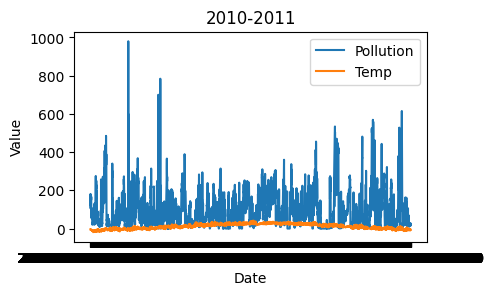

In [149]:
plt.figure(figsize=(10, 6))

# Wykres dla zakresu 2010-2011
plt.subplot(2, 2, 1)
plt.plot(range_2010_2011["date"], range_2010_2011["pollution"], label="Pollution")
plt.plot(range_2010_2011["date"], range_2010_2011["temp"], label="Temp")
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("2010-2011")
plt.legend()

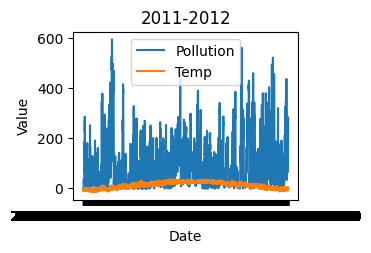

In [150]:
# Wykres dla zakresu 2011-2012
plt.subplot(2, 2, 2)
plt.plot(range_2011_2012["date"], range_2011_2012["pollution"], label="Pollution")
plt.plot(range_2011_2012["date"], range_2011_2012["temp"], label="Temp")
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("2011-2012")
plt.legend()

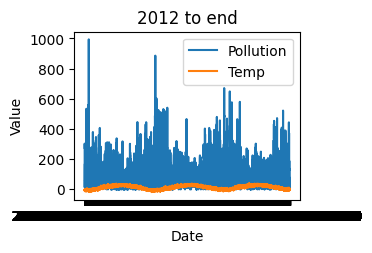

In [151]:
# Wykres dla zakresu 2012 do końca
plt.subplot(2, 2, 3)
plt.plot(range_2012_end["date"], range_2012_end["pollution"], label="Pollution")
plt.plot(range_2012_end["date"], range_2012_end["temp"], label="Temp")
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("2012 to end")
plt.legend()

In [152]:
# Dostosowanie wyglądu wykresów
plt.tight_layout()

# Wyświetlenie wykresów
plt.show()

<Figure size 640x480 with 0 Axes>

In [153]:
# funkcja prognozująca zanieczyszczenie
def make_predictions(data, num_days, category):
    # Przygotowanie danych
    time_series = data[
        category
    ].values  # Wybierz zmienną celu (np. pollution) jako tablicę wartości

    # Dopasowanie modelu ARIMA
    model = ARIMA(
        time_series, order=(1, 0, 0)
    )  # Przykładowe parametry modelu ARIMA - do dostosowania
    model_fit = model.fit()

    # Prognozowanie
    forecast_values = model_fit.forecast(steps=num_days)

    # Tworzenie DataFrame z prognozami
    dates = pd.date_range(start=data["date"].iloc[-1], periods=num_days + 1, freq="D")[
        1:
    ]  # Wygeneruj daty dla prognoz
    forecast_df = pd.DataFrame({"Date": dates, "Forecast": forecast_values})

    return forecast_df

In [154]:
# Wyswietlanie predykcji zanieczyszczenia dla zakresu od 1 stycznia do 5 stycznia 2011
forecast_2010_2011_pollution = make_predictions(range_2010_2011, 30, 'pollution')
forecast_2010_2011_pollution['Real'] = range_2010_2011['pollution']
print("Prognozy dla zakresu 2010-2011:")
print(forecast_2010_2011_pollution)

Prognozy dla zakresu 2010-2011:
                  Date   Forecast   Real
0  2011-01-01 23:00:00  26.232697  129.0
1  2011-01-02 23:00:00  30.224473  148.0
2  2011-01-03 23:00:00  33.989042  159.0
3  2011-01-04 23:00:00  37.539337  181.0
4  2011-01-05 23:00:00  40.887553  138.0
5  2011-01-06 23:00:00  44.045192  109.0
6  2011-01-07 23:00:00  47.023103  105.0
7  2011-01-08 23:00:00  49.831514  124.0
8  2011-01-09 23:00:00  52.480074  120.0
9  2011-01-10 23:00:00  54.977881  132.0
10 2011-01-11 23:00:00  57.333516  140.0
11 2011-01-12 23:00:00  59.555071  152.0
12 2011-01-13 23:00:00  61.650178  148.0
13 2011-01-14 23:00:00  63.626033  164.0
14 2011-01-15 23:00:00  65.489426  158.0
15 2011-01-16 23:00:00  67.246756  154.0
16 2011-01-17 23:00:00  68.904061  159.0
17 2011-01-18 23:00:00  70.467035  164.0
18 2011-01-19 23:00:00  71.941045  170.0
19 2011-01-20 23:00:00  73.331157  149.0
20 2011-01-21 23:00:00  74.642145  154.0
21 2011-01-22 23:00:00  75.878514  164.0
22 2011-01-23 23:00:00  7

In [155]:
# Wyswietlanie predykcji zanieczyszczenia dla zakresu od 1 stycznia do 5 stycznia 2012
forecast_2011_2012_pollution = make_predictions(range_2011_2012, 30, 'pollution')
forecast_2011_2012_pollution['Real'] = range_2011_2012['pollution']
print("Prognozy dla zakresu 2011-2012:")
print(forecast_2011_2012_pollution)

Prognozy dla zakresu 2011-2012:
                  Date    Forecast  Real
0  2012-01-01 23:00:00  275.145801   0.0
1  2012-01-02 23:00:00  267.612626   0.0
2  2012-01-03 23:00:00  260.387352   0.0
3  2012-01-04 23:00:00  253.457396   0.0
4  2012-01-05 23:00:00  246.810686   0.0
5  2012-01-06 23:00:00  240.435646   0.0
6  2012-01-07 23:00:00  234.321171   0.0
7  2012-01-08 23:00:00  228.456613   0.0
8  2012-01-09 23:00:00  222.831755   0.0
9  2012-01-10 23:00:00  217.436801   0.0
10 2012-01-11 23:00:00  212.262354   0.0
11 2012-01-12 23:00:00  207.299401   0.0
12 2012-01-13 23:00:00  202.539298   0.0
13 2012-01-14 23:00:00  197.973753   0.0
14 2012-01-15 23:00:00  193.594816   0.0
15 2012-01-16 23:00:00  189.394857   0.0
16 2012-01-17 23:00:00  185.366563   0.0
17 2012-01-18 23:00:00  181.502916   0.0
18 2012-01-19 23:00:00  177.797188   0.0
19 2012-01-20 23:00:00  174.242923   0.0
20 2012-01-21 23:00:00  170.833930   0.0
21 2012-01-22 23:00:00  167.564273   0.0
22 2012-01-23 23:00:00  1

In [156]:
# Wyswietlanie predykcji zanieczyszczenia dla zakresu od 1 stycznia do 5 stycznia 2013
forecast_2012_end_pollution = make_predictions(range_2012_end, 30, 'pollution')
forecast_2012_end_pollution['Real'] = range_2012_end['pollution']
print("Prognozy dla zakresu 2012+:")
print(forecast_2012_end_pollution)

Prognozy dla zakresu 2012+:
                  Date   Forecast   Real
0  2015-01-01 23:00:00  15.430402  275.0
1  2015-01-02 23:00:00  18.717802  303.0
2  2015-01-03 23:00:00  21.868163  215.0
3  2015-01-04 23:00:00  24.887196  222.0
4  2015-01-05 23:00:00  27.780376   85.0
5  2015-01-06 23:00:00  30.552949   38.0
6  2015-01-07 23:00:00  33.209944   23.0
7  2015-01-08 23:00:00  35.756178   19.0
8  2015-01-09 23:00:00  38.196269   14.0
9  2015-01-10 23:00:00  40.534641   16.0
10 2015-01-11 23:00:00  42.775534   21.0
11 2015-01-12 23:00:00  44.923013   22.0
12 2015-01-13 23:00:00  46.980970   22.0
13 2015-01-14 23:00:00  48.953139   17.0
14 2015-01-15 23:00:00  50.843095   22.0
15 2015-01-16 23:00:00  52.654265   29.0
16 2015-01-17 23:00:00  54.389934   39.0
17 2015-01-18 23:00:00  56.053249   42.0
18 2015-01-19 23:00:00  57.647226   55.0
19 2015-01-20 23:00:00  59.174756   55.0
20 2015-01-21 23:00:00  60.638609   72.0
21 2015-01-22 23:00:00  62.041439   81.0
22 2015-01-23 23:00:00  63.38

In [157]:
# prognoza temperatury dla 1 do 30 stycznia 2011
forecast_2010_2011_temp = make_predictions(range_2010_2011, 30, 'temp')
forecast_2010_2011_temp['Real'] = range_2010_2011['temp']
print("Prognozy temperatury dla zakresu 2010-2011:")
print(forecast_2010_2011_temp)

Prognozy temperatury dla zakresu 2010-2011:
                  Date  Forecast  Real
0  2011-01-01 23:00:00 -6.883419  -4.0
1  2011-01-02 23:00:00 -6.767565  -4.0
2  2011-01-03 23:00:00 -6.652434  -5.0
3  2011-01-04 23:00:00 -6.538021  -5.0
4  2011-01-05 23:00:00 -6.424322  -5.0
5  2011-01-06 23:00:00 -6.311333  -6.0
6  2011-01-07 23:00:00 -6.199049  -6.0
7  2011-01-08 23:00:00 -6.087465  -5.0
8  2011-01-09 23:00:00 -5.976578  -6.0
9  2011-01-10 23:00:00 -5.866383  -5.0
10 2011-01-11 23:00:00 -5.756875  -5.0
11 2011-01-12 23:00:00 -5.648051  -5.0
12 2011-01-13 23:00:00 -5.539906  -5.0
13 2011-01-14 23:00:00 -5.432435  -5.0
14 2011-01-15 23:00:00 -5.325635  -5.0
15 2011-01-16 23:00:00 -5.219502  -5.0
16 2011-01-17 23:00:00 -5.114031  -5.0
17 2011-01-18 23:00:00 -5.009218  -5.0
18 2011-01-19 23:00:00 -4.905059  -5.0
19 2011-01-20 23:00:00 -4.801550  -5.0
20 2011-01-21 23:00:00 -4.698687  -5.0
21 2011-01-22 23:00:00 -4.596465  -5.0
22 2011-01-23 23:00:00 -4.494882  -6.0
23 2011-01-24 23:00:

In [158]:
# prognoza temperatury dla 1 do 30 stycznia 2012
forecast_2011_2012_temp = make_predictions(range_2011_2012, 30, 'temp')
forecast_2011_2012_temp['Real'] = range_2011_2012['temp']
print("Prognozy temperatury dla zakresu 2011-2012:")
print(forecast_2011_2012_temp)

Prognozy temperatury dla zakresu 2011-2012:
                  Date  Forecast  Real
0  2012-01-01 23:00:00 -5.855113  -9.0
1  2012-01-02 23:00:00 -5.711356 -10.0
2  2012-01-03 23:00:00 -5.568721 -11.0
3  2012-01-04 23:00:00 -5.427199 -10.0
4  2012-01-05 23:00:00 -5.286782 -12.0
5  2012-01-06 23:00:00 -5.147461 -11.0
6  2012-01-07 23:00:00 -5.009227 -12.0
7  2012-01-08 23:00:00 -4.872071 -12.0
8  2012-01-09 23:00:00 -4.735987  -8.0
9  2012-01-10 23:00:00 -4.600964  -7.0
10 2012-01-11 23:00:00 -4.466995  -6.0
11 2012-01-12 23:00:00 -4.334071  -4.0
12 2012-01-13 23:00:00 -4.202185  -3.0
13 2012-01-14 23:00:00 -4.071328  -2.0
14 2012-01-15 23:00:00 -3.941492  -1.0
15 2012-01-16 23:00:00 -3.812670  -1.0
16 2012-01-17 23:00:00 -3.684853  -1.0
17 2012-01-18 23:00:00 -3.558033  -5.0
18 2012-01-19 23:00:00 -3.432204  -3.0
19 2012-01-20 23:00:00 -3.307356  -5.0
20 2012-01-21 23:00:00 -3.183482  -7.0
21 2012-01-22 23:00:00 -3.060576  -5.0
22 2012-01-23 23:00:00 -2.938628  -9.0
23 2012-01-24 23:00:

In [159]:
# prognoza temperatury dla 1 do 30 stycznia 2013
forecast_2012_temp = make_predictions(range_2012_end, 30, 'temp')
forecast_2012_temp['Real'] = range_2012_end['temp']
print("Prognozy temperatury dla zakresu 2012+:")
print(forecast_2012_temp)

Prognozy temperatury dla zakresu 2012+:
                  Date  Forecast  Real
0  2015-01-01 23:00:00 -2.875700  -8.0
1  2015-01-02 23:00:00 -2.752385 -10.0
2  2015-01-03 23:00:00 -2.630048  -9.0
3  2015-01-04 23:00:00 -2.508681  -9.0
4  2015-01-05 23:00:00 -2.388275  -4.0
5  2015-01-06 23:00:00 -2.268824  -4.0
6  2015-01-07 23:00:00 -2.150320  -4.0
7  2015-01-08 23:00:00 -2.032755  -5.0
8  2015-01-09 23:00:00 -1.916122  -4.0
9  2015-01-10 23:00:00 -1.800414  -3.0
10 2015-01-11 23:00:00 -1.685622  -2.0
11 2015-01-12 23:00:00 -1.571741   0.0
12 2015-01-13 23:00:00 -1.458762   0.0
13 2015-01-14 23:00:00 -1.346679   1.0
14 2015-01-15 23:00:00 -1.235484   2.0
15 2015-01-16 23:00:00 -1.125171   2.0
16 2015-01-17 23:00:00 -1.015732   0.0
17 2015-01-18 23:00:00 -0.907160   0.0
18 2015-01-19 23:00:00 -0.799449  -2.0
19 2015-01-20 23:00:00 -0.692592  -4.0
20 2015-01-21 23:00:00 -0.586582  -5.0
21 2015-01-22 23:00:00 -0.481412  -6.0
22 2015-01-23 23:00:00 -0.377076  -4.0
23 2015-01-24 23:00:00 -

In [160]:
print(range_2010_2011.head())
print(range_2011_2012.head())
print(range_2012_end.head())

                  date  pollution  temp  index
0  2010-01-02 00:00:00      129.0  -4.0      0
1  2010-01-02 01:00:00      148.0  -4.0      1
2  2010-01-02 02:00:00      159.0  -5.0      2
3  2010-01-02 03:00:00      181.0  -5.0      3
4  2010-01-02 04:00:00      138.0  -5.0      4
                  date  pollution  temp  index
0  2011-01-01 00:00:00        0.0  -9.0      0
1  2011-01-01 01:00:00        0.0 -10.0      1
2  2011-01-01 02:00:00        0.0 -11.0      2
3  2011-01-01 03:00:00        0.0 -10.0      3
4  2011-01-01 04:00:00        0.0 -12.0      4
                  date  pollution  temp  index
0  2012-01-01 00:00:00      275.0  -8.0      0
1  2012-01-01 01:00:00      303.0 -10.0      1
2  2012-01-01 02:00:00      215.0  -9.0      2
3  2012-01-01 03:00:00      222.0  -9.0      3
4  2012-01-01 04:00:00       85.0  -4.0      4


In [161]:
mse_dict = {}
r2_dict = {}

MSE: 6638.223454855195
R2 score: -4.35386655964104


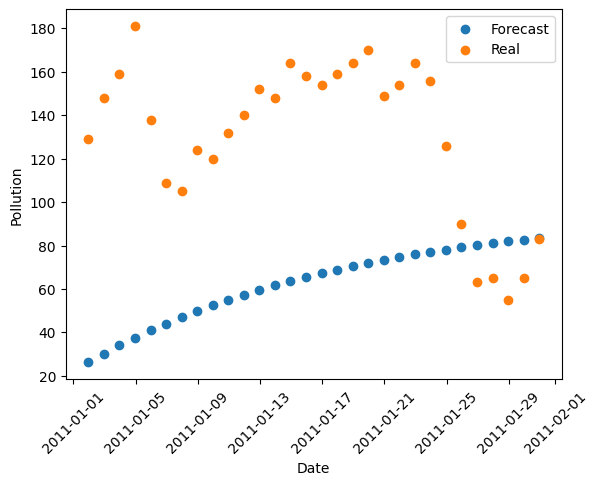

In [162]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

print(f'MSE: {mean_squared_error(forecast_2010_2011_pollution["Real"], forecast_2010_2011_pollution["Forecast"])}')
print(f'R2 score: {r2_score(forecast_2010_2011_pollution["Real"], forecast_2010_2011_pollution["Forecast"])}')

mse_dict['ARIMA_2010_Pollution'] = mean_squared_error(forecast_2010_2011_pollution["Real"], forecast_2010_2011_pollution["Forecast"])
r2_dict['ARIMA_2010_Pollution'] = r2_score(forecast_2010_2011_pollution["Real"], forecast_2010_2011_pollution["Forecast"])

# Wygenerowanie wykresu
plt.scatter(forecast_2010_2011_pollution['Date'], forecast_2010_2011_pollution['Forecast'], label='Forecast')
plt.scatter(forecast_2010_2011_pollution['Date'], forecast_2010_2011_pollution['Real'], label='Real')

# Ustawienie etykiet osi
plt.xlabel('Date')
plt.ylabel('Pollution')
plt.xticks(rotation=45)

# Dodanie legendy
plt.legend()

# Wyświetlenie wykresu
plt.show()

MSE: 39415.894184107594
R2 score: -397.36836759196444


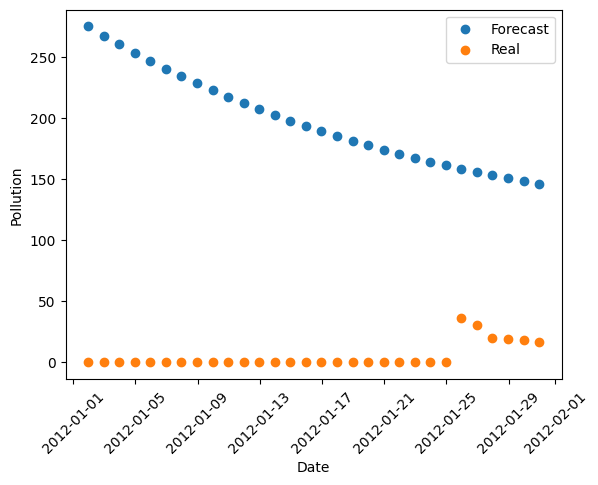

In [163]:
import matplotlib.pyplot as plt

print(f'MSE: {mean_squared_error(forecast_2011_2012_pollution["Real"], forecast_2011_2012_pollution["Forecast"])}')
print(f'R2 score: {r2_score(forecast_2011_2012_pollution["Real"], forecast_2011_2012_pollution["Forecast"])}')

mse_dict['ARIMA_2011_Pollution'] = mean_squared_error(forecast_2011_2012_pollution["Real"], forecast_2011_2012_pollution["Forecast"])
r2_dict['ARIMA_2011_Pollution'] = r2_score(forecast_2011_2012_pollution["Real"], forecast_2011_2012_pollution["Forecast"])

# Wygenerowanie wykresu
plt.scatter(forecast_2011_2012_pollution['Date'], forecast_2011_2012_pollution['Forecast'], label='Forecast')
plt.scatter(forecast_2011_2012_pollution['Date'], forecast_2011_2012_pollution['Real'], label='Real')

# Ustawienie etykiet osi
plt.xlabel('Date')
plt.ylabel('Pollution')
plt.xticks(rotation=45)

# Dodanie legendy
plt.legend()

# Wyświetlenie wykresu
plt.show()

MSE: 8105.91838010485
R2 score: -0.41372543717804855


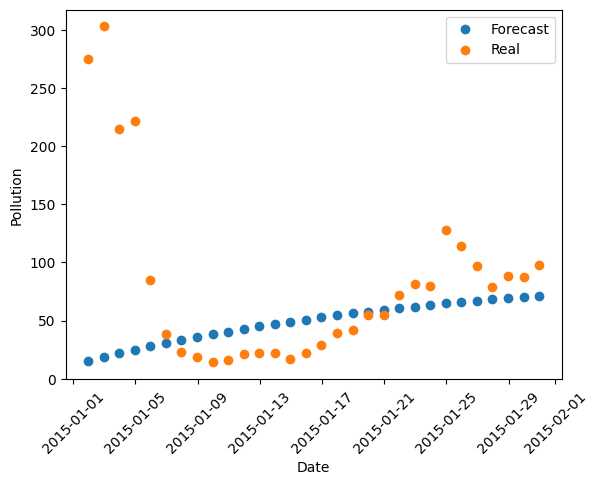

In [164]:
import matplotlib.pyplot as plt

print(f"MSE: {mean_squared_error(forecast_2012_end_pollution['Real'], forecast_2012_end_pollution['Forecast'])}")
print(f"R2 score: {r2_score(forecast_2012_end_pollution['Real'], forecast_2012_end_pollution['Forecast'])}")

mse_dict['ARIMA_2012_Pollution'] = mean_squared_error(forecast_2012_end_pollution["Real"], forecast_2012_end_pollution["Forecast"])
r2_dict['ARIMA_2012_Pollution'] = r2_score(forecast_2012_end_pollution["Real"], forecast_2012_end_pollution["Forecast"])

# Wygenerowanie wykresu
plt.scatter(forecast_2012_end_pollution['Date'], forecast_2012_end_pollution['Forecast'], label='Forecast')
plt.scatter(forecast_2012_end_pollution['Date'], forecast_2012_end_pollution['Real'], label='Real')

# Ustawienie etykiet osi
plt.xlabel('Date')
plt.ylabel('Pollution')
plt.xticks(rotation=45)

# Dodanie legendy
plt.legend()

# Wyświetlenie wykresu
plt.show()

MSE: 2.7612363287834762
R2 score: -2.529989624865239


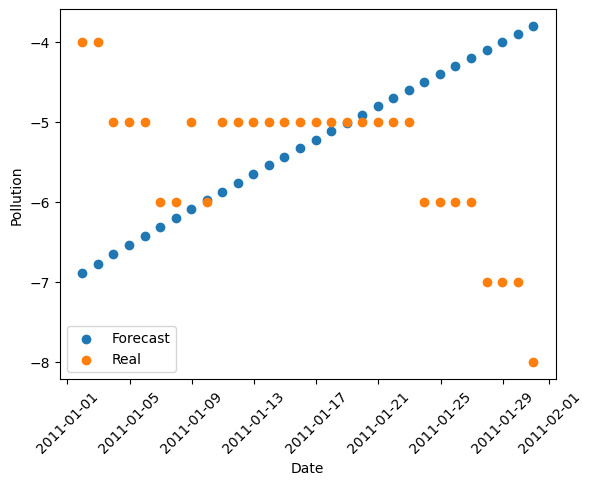

In [165]:
import matplotlib.pyplot as plt

print(f"MSE: {mean_squared_error(forecast_2010_2011_temp['Real'], forecast_2010_2011_temp['Forecast'])}")
print(f"R2 score: {r2_score(forecast_2010_2011_temp['Real'], forecast_2010_2011_temp['Forecast'])}")

mse_dict['ARIMA_2010_Temp'] = mean_squared_error(forecast_2010_2011_temp["Real"], forecast_2010_2011_temp["Forecast"])
r2_dict['ARIMA_2010_Temp'] = r2_score(forecast_2010_2011_temp["Real"], forecast_2010_2011_temp["Forecast"])

# Wygenerowanie wykresu
plt.scatter(forecast_2010_2011_temp['Date'], forecast_2010_2011_temp['Forecast'], label='Forecast')
plt.scatter(forecast_2010_2011_temp['Date'], forecast_2010_2011_temp['Real'], label='Real')

# Ustawienie etykiet osi
plt.xlabel('Date')
plt.ylabel('Pollution')
plt.xticks(rotation=45)

# Dodanie legendy
plt.legend()

# Wyświetlenie wykresu
plt.show()

MSE: 17.72205645674874
R2 score: -0.6502690958172652


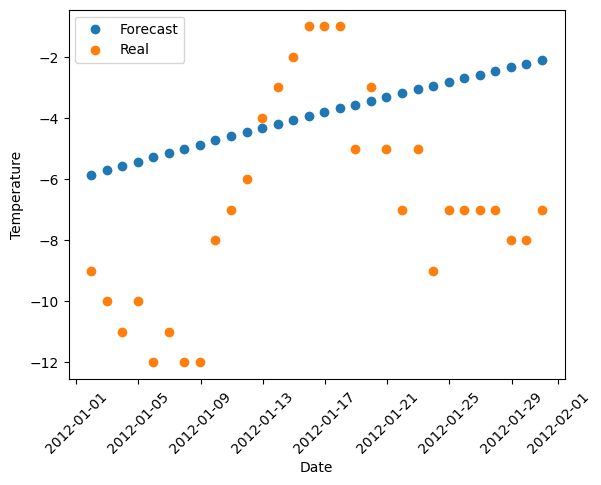

In [166]:
import matplotlib.pyplot as plt

print(f"MSE: {mean_squared_error(forecast_2011_2012_temp['Real'], forecast_2011_2012_temp['Forecast'])}")
print(f"R2 score: {r2_score(forecast_2011_2012_temp['Real'], forecast_2011_2012_temp['Forecast'])}")

mse_dict['ARIMA_2011_Temp'] = mean_squared_error(forecast_2011_2012_temp["Real"], forecast_2011_2012_temp["Forecast"])
r2_dict['ARIMA_2011_Temp'] = r2_score(forecast_2011_2012_temp["Real"], forecast_2011_2012_temp["Forecast"])

# Wygenerowanie wykresu
plt.scatter(forecast_2011_2012_temp['Date'], forecast_2011_2012_temp['Forecast'], label='Forecast')
plt.scatter(forecast_2011_2012_temp['Date'], forecast_2011_2012_temp['Real'], label='Real')

# Ustawienie etykiet osi
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.xticks(rotation=45)

# Dodanie legendy
plt.legend()

# Wyświetlenie wykresu
plt.show()

MSE: 13.123987475257895
R2 score: -0.4503424272755532


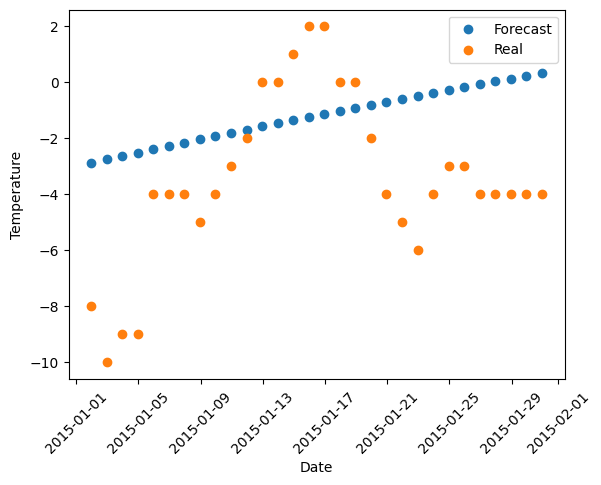

In [167]:
import matplotlib.pyplot as plt

print(f"MSE: {mean_squared_error(forecast_2012_temp['Real'], forecast_2012_temp['Forecast'])}")
print(f"R2 score: {r2_score(forecast_2012_temp['Real'], forecast_2012_temp['Forecast'])}")

mse_dict['ARIMA_2012_Temp'] = mean_squared_error(forecast_2012_temp["Real"], forecast_2012_temp["Forecast"])
r2_dict['ARIMA_2012_Temp'] = r2_score(forecast_2012_temp["Real"], forecast_2012_temp["Forecast"])

# Wygenerowanie wykresu
plt.scatter(forecast_2012_temp['Date'], forecast_2012_temp['Forecast'], label='Forecast')
plt.scatter(forecast_2012_temp['Date'], forecast_2012_temp['Real'], label='Real')

# Ustawienie etykiet osi
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.xticks(rotation=45)

# Dodanie legendy
plt.legend()

# Wyświetlenie wykresu
plt.show()

In [168]:
# LSTM czyli (Long Short-Term Memory) jest rodzajem rekurencyjnej sieci neuronowej (RNN), która jest efektywna w analizie i przewidywaniu danych sekwencyjnych, takich jak dane czasowe.

In [169]:
# Wczytanie danych
df = pd.read_csv("data.csv", header=0)
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")

In [170]:
# Wyodrębnienie zakresu dat
start_date_2010_2011 = pd.to_datetime("2010-01-01")
end_date_2010_2011 = pd.to_datetime("2011-01-01")
data_2010_2011 = df.loc[
    (df.index >= start_date_2010_2011) & (df.index < end_date_2010_2011)
]

In [171]:
# Przygotowanie danych
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_2010_2011["pollution"].values.reshape(-1, 1))

In [172]:
# Podział danych na zestawy treningowe i testowe
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [173]:
# Tworzenie sekwencji danych
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i : i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)


sequence_length = 10
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

In [174]:
# Budowa modelu LSTM
model = Sequential()
model.add(LSTM(64, activation="relu", input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mean_squared_error")

In [175]:
# Trenowanie modelu
model.fit(X_train, y_train, epochs=10, batch_size=16)

Epoch 1/10
437/437 [==============================] - 3s 4ms/step - loss: 0.0022
Epoch 2/10
437/437 [==============================] - 2s 4ms/step - loss: 0.0013
Epoch 3/10
437/437 [==============================] - 2s 4ms/step - loss: 0.0011
Epoch 4/10
437/437 [==============================] - 2s 4ms/step - loss: 0.0011
Epoch 5/10
437/437 [==============================] - 2s 4ms/step - loss: 0.0010
Epoch 6/10
437/437 [==============================] - 2s 4ms/step - loss: 0.0010
Epoch 7/10
437/437 [==============================] - 2s 4ms/step - loss: 9.9123e-04
Epoch 8/10
437/437 [==============================] - 2s 4ms/step - loss: 9.6507e-04
Epoch 9/10
437/437 [==============================] - 2s 4ms/step - loss: 9.7270e-04
Epoch 10/10
437/437 [==============================] - 2s 4ms/step - loss: 9.6387e-04


In [176]:
# Prognozowanie
predicted_data = model.predict(X_test)

55/55 [==============================] - 0s 2ms/step


In [177]:
# Odwrócenie skalowania danych
predicted_data = scaler.inverse_transform(predicted_data)

MSE: 668.4657254239478
R2 score: 0.9526867041845256


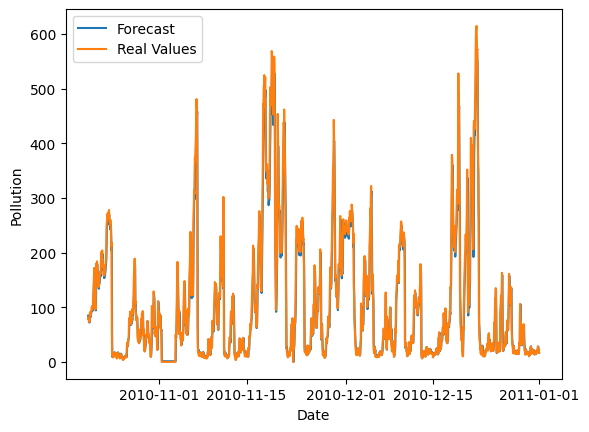

In [178]:
print(f"MSE: {mean_squared_error(data_2010_2011['pollution'].values[train_size + sequence_length :], predicted_data)}")
print(f"R2 score: {r2_score(data_2010_2011['pollution'].values[train_size + sequence_length :], predicted_data)}")

mse_dict['LTSM_2010_Pollution'] = mean_squared_error(data_2010_2011['pollution'].values[train_size + sequence_length :], predicted_data)
r2_dict['LTSM_2010_Pollution'] = r2_score(data_2010_2011['pollution'].values[train_size + sequence_length :], predicted_data)

# Wykres prognoz i rzeczywistych wartości
plt.plot(
    data_2010_2011.index[train_size + sequence_length :],
    predicted_data,
    label="Forecast",
)
plt.plot(
    data_2010_2011.index[train_size + sequence_length :],
    data_2010_2011["pollution"].values[train_size + sequence_length :],
    label="Real Values",
)
plt.xlabel("Date")
plt.ylabel("Pollution")
plt.legend()
plt.show()

Epoch 1/10
438/438 [==============================] - 3s 4ms/step - loss: 0.0048
Epoch 2/10
438/438 [==============================] - 2s 4ms/step - loss: 0.0024
Epoch 3/10
438/438 [==============================] - 2s 4ms/step - loss: 0.0020
Epoch 4/10
438/438 [==============================] - 2s 4ms/step - loss: 0.0018
Epoch 5/10
438/438 [==============================] - 2s 4ms/step - loss: 0.0018
Epoch 6/10
438/438 [==============================] - 2s 4ms/step - loss: 0.0018
Epoch 7/10
438/438 [==============================] - 2s 4ms/step - loss: 0.0017
Epoch 8/10
438/438 [==============================] - 2s 3ms/step - loss: 0.0017
Epoch 9/10
438/438 [==============================] - 2s 4ms/step - loss: 0.0017
Epoch 10/10
55/55 [==============================] - 0s 2ms/step
MSE: 1019.6993222802915
R2 score: 0.9119754797167096


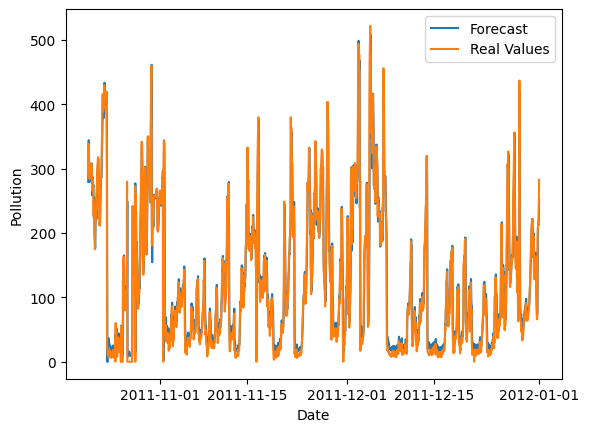

In [179]:
# Wczytanie danych
df = pd.read_csv("data.csv", header=0)
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
# Wyodrębnienie zakresu dat
start_date_2011_2012 = pd.to_datetime("2011-01-01")
end_date_2011_2012 = pd.to_datetime("2012-01-01")
data_2011_2012 = df.loc[
    (df.index >= start_date_2011_2012) & (df.index < end_date_2011_2012)
]
# Przygotowanie danych
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_2011_2012["pollution"].values.reshape(-1, 1))
# Podział danych na zestawy treningowe i testowe
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]
# Tworzenie sekwencji danych
sequence_length = 10
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)
# Budowa modelu LSTM
model = Sequential()
model.add(LSTM(64, activation="relu", input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mean_squared_error")
# Trenowanie modelu
model.fit(X_train, y_train, epochs=10, batch_size=16)
# Prognozowanie
predicted_data = model.predict(X_test)
# Odwrócenie skalowania danych
predicted_data = scaler.inverse_transform(predicted_data)

print(f"MSE: {mean_squared_error(data_2011_2012['pollution'].values[train_size + sequence_length :], predicted_data)}")
print(f"R2 score: {r2_score(data_2011_2012['pollution'].values[train_size + sequence_length :], predicted_data)}")

mse_dict['LTSM_2011_Pollution'] = mean_squared_error(data_2011_2012['pollution'].values[train_size + sequence_length :], predicted_data)
r2_dict['LTSM_2011_Pollution'] = r2_score(data_2011_2012['pollution'].values[train_size + sequence_length :], predicted_data)

# Wykres prognoz i rzeczywistych wartości
plt.plot(
    data_2011_2012.index[train_size + sequence_length :],
    predicted_data,
    label="Forecast",
)
plt.plot(
    data_2011_2012.index[train_size + sequence_length :],
    data_2011_2012["pollution"].values[train_size + sequence_length :],
    label="Real Values",
)
plt.xlabel("Date")
plt.ylabel("Pollution")
plt.legend()
plt.show()

Epoch 1/10
1315/1315 [==============================] - 5s 3ms/step - loss: 0.0017
Epoch 2/10
1315/1315 [==============================] - 4s 3ms/step - loss: 8.7680e-04
Epoch 3/10
1315/1315 [==============================] - 5s 4ms/step - loss: 7.9659e-04
Epoch 4/10
1315/1315 [==============================] - 5s 3ms/step - loss: 7.6649e-04
Epoch 5/10
1315/1315 [==============================] - 5s 3ms/step - loss: 7.5236e-04
Epoch 6/10
1315/1315 [==============================] - 5s 4ms/step - loss: 7.3596e-04
Epoch 7/10
1315/1315 [==============================] - 5s 4ms/step - loss: 7.2598e-04
Epoch 8/10
1315/1315 [==============================] - 4s 3ms/step - loss: 7.1896e-04
Epoch 9/10
1315/1315 [==============================] - 4s 3ms/step - loss: 7.1392e-04
Epoch 10/10
165/165 [==============================] - 0s 2ms/step
MSE: 437.2576285942832
R2 score: 0.9379044241386576


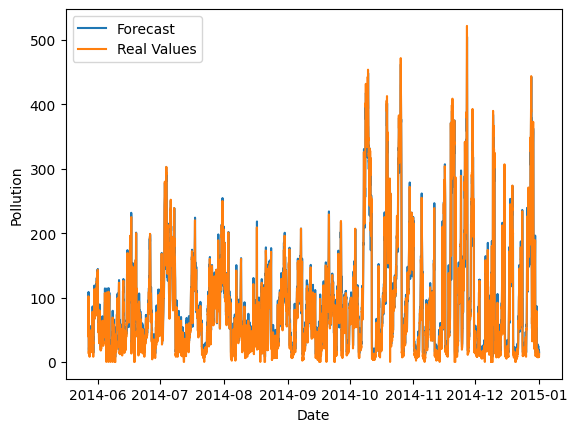

In [180]:
# Wczytanie danych
df = pd.read_csv("data.csv", header=0)
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
# Wyodrębnienie zakresu dat
start_date_2012_end = pd.to_datetime("2012-01-01")
data_2012_end = df.loc[(df.index >= start_date_2012_end)]
# Przygotowanie danych
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_2012_end["pollution"].values.reshape(-1, 1))
# Podział danych na zestawy treningowe i testowe
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]
# Tworzenie sekwencji danych
sequence_length = 10
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)
# Budowa modelu LSTM
model = Sequential()
model.add(LSTM(64, activation="relu", input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mean_squared_error")
# Trenowanie modelu
model.fit(X_train, y_train, epochs=10, batch_size=16)
# Prognozowanie
predicted_data = model.predict(X_test)
# Odwrócenie skalowania danych
predicted_data = scaler.inverse_transform(predicted_data)

print(f"MSE: {mean_squared_error(data_2012_end['pollution'].values[train_size + sequence_length :], predicted_data)}")
print(f"R2 score: {r2_score(data_2012_end['pollution'].values[train_size + sequence_length :], predicted_data)}")

mse_dict['LTSM_2012_Pollution'] = mean_squared_error(data_2012_end['pollution'].values[train_size + sequence_length :], predicted_data)
r2_dict['LTSM_2012_Pollution'] = r2_score(data_2012_end['pollution'].values[train_size + sequence_length :], predicted_data)

# Wykres prognoz i rzeczywistych wartości
plt.plot(
    data_2012_end.index[train_size + sequence_length :],
    predicted_data,
    label="Forecast",
)
plt.plot(
    data_2012_end.index[train_size + sequence_length :],
    data_2012_end["pollution"].values[train_size + sequence_length :],
    label="Real Values",
)
plt.xlabel("Date")
plt.ylabel("Pollution")
plt.legend()
plt.show()

In [181]:
# Przygotowanie danych
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_2010_2011["temp"].values.reshape(-1, 1))

In [182]:
# Podział danych na zestawy treningowe i testowe
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [183]:
# Tworzenie sekwencji danych
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i : i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)


sequence_length = 10
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

In [184]:
# Budowa modelu LSTM
model = Sequential()
model.add(LSTM(64, activation="relu", input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mean_squared_error")

In [185]:
# Trenowanie modelu
model.fit(X_train, y_train, epochs=10, batch_size=16)

Epoch 1/10
437/437 [==============================] - 3s 4ms/step - loss: 0.0096
Epoch 2/10
437/437 [==============================] - 2s 4ms/step - loss: 0.0017
Epoch 3/10
437/437 [==============================] - 2s 4ms/step - loss: 0.0013
Epoch 4/10
437/437 [==============================] - 2s 4ms/step - loss: 0.0012
Epoch 5/10
437/437 [==============================] - 2s 4ms/step - loss: 8.8954e-04
Epoch 6/10
437/437 [==============================] - 2s 4ms/step - loss: 6.3110e-04
Epoch 7/10
437/437 [==============================] - 2s 4ms/step - loss: 5.1465e-04
Epoch 8/10
437/437 [==============================] - 2s 4ms/step - loss: 5.1657e-04
Epoch 9/10
437/437 [==============================] - 2s 4ms/step - loss: 4.7810e-04
Epoch 10/10
437/437 [==============================] - 2s 4ms/step - loss: 4.8916e-04


In [186]:
# Prognozowanie
predicted_data = model.predict(X_test)

55/55 [==============================] - 0s 2ms/step


In [187]:
# Odwrócenie skalowania danych
predicted_data = scaler.inverse_transform(predicted_data)

MSE: 2.476481815381229
R2 score: 0.9435693712064813


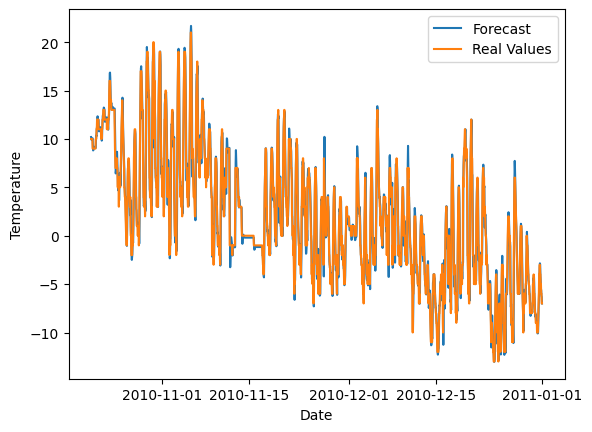

In [188]:
print(f"MSE: {mean_squared_error(data_2010_2011['temp'].values[train_size + sequence_length :], predicted_data)}")
print(f"R2 score: {r2_score(data_2010_2011['temp'].values[train_size + sequence_length :], predicted_data)}")

mse_dict['LTSM_2010_Temp'] = mean_squared_error(data_2010_2011['temp'].values[train_size + sequence_length :], predicted_data)
r2_dict['LTSM_2010_Temp'] = r2_score(data_2010_2011['temp'].values[train_size + sequence_length :], predicted_data)

# Wykres prognoz i rzeczywistych wartości
plt.plot(
    data_2010_2011.index[train_size + sequence_length :],
    predicted_data,
    label="Forecast",
)
plt.plot(
    data_2010_2011.index[train_size + sequence_length :],
    data_2010_2011["temp"].values[train_size + sequence_length :],
    label="Real Values",
)
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()

In [189]:
# Wczytanie danych
df = pd.read_csv("data.csv", header=0)
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")

In [190]:
# Wyodrębnienie zakresu dat
start_date_2011_2012 = pd.to_datetime("2011-01-01")
end_date_2011_2012 = pd.to_datetime("2012-01-01")
data_2011_2012 = df.loc[
    (df.index >= start_date_2011_2012) & (df.index < end_date_2011_2012)
]

In [191]:
# Przygotowanie danych
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_2011_2012["temp"].values.reshape(-1, 1))

In [192]:
# Podział danych na zestawy treningowe i testowe
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [193]:
# Tworzenie sekwencji danych
sequence_length = 10
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

In [194]:
# Budowa modelu LSTM
model = Sequential()
model.add(LSTM(64, activation="relu", input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mean_squared_error")

In [195]:
# Trenowanie modelu
model.fit(X_train, y_train, epochs=10, batch_size=16)

Epoch 1/10
438/438 [==============================] - 3s 4ms/step - loss: 0.0186
Epoch 2/10
438/438 [==============================] - 2s 4ms/step - loss: 0.0023
Epoch 3/10
438/438 [==============================] - 2s 4ms/step - loss: 0.0017
Epoch 4/10
438/438 [==============================] - 2s 4ms/step - loss: 0.0012
Epoch 5/10
438/438 [==============================] - 2s 4ms/step - loss: 0.0010
Epoch 6/10
438/438 [==============================] - 2s 4ms/step - loss: 9.0453e-04
Epoch 7/10
438/438 [==============================] - 2s 4ms/step - loss: 8.0912e-04
Epoch 8/10
438/438 [==============================] - 2s 4ms/step - loss: 8.3505e-04
Epoch 9/10
438/438 [==============================] - 2s 4ms/step - loss: 7.6555e-04
Epoch 10/10
438/438 [==============================] - 2s 4ms/step - loss: 7.4401e-04


In [196]:
# Prognozowanie
predicted_data = model.predict(X_test)

55/55 [==============================] - 0s 2ms/step


In [197]:
# Odwrócenie skalowania danych
predicted_data = scaler.inverse_transform(predicted_data)

MSE: 2.0884971061818587
R2 score: 0.9552982004966832


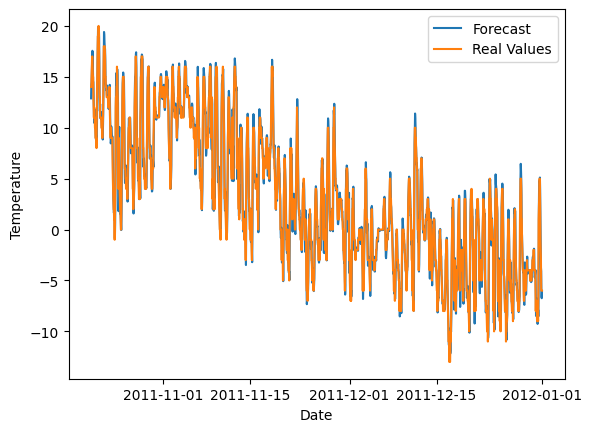

In [198]:
print(f"MSE: {mean_squared_error(data_2011_2012['temp'].values[train_size + sequence_length :], predicted_data)}")
print(f"R2 score: {r2_score(data_2011_2012['temp'].values[train_size + sequence_length :], predicted_data)}")

mse_dict['LTSM_2011_Temp'] = mean_squared_error(data_2011_2012['temp'].values[train_size + sequence_length :], predicted_data)
r2_dict['LTSM_2011_Temp'] = r2_score(data_2011_2012['temp'].values[train_size + sequence_length :], predicted_data)

# Wykres prognoz i rzeczywistych wartości
plt.plot(
    data_2011_2012.index[train_size + sequence_length :],
    predicted_data,
    label="Forecast",
)
plt.plot(
    data_2011_2012.index[train_size + sequence_length :],
    data_2011_2012["temp"].values[train_size + sequence_length :],
    label="Real Values",
)
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()

In [199]:
# Wczytanie danych
df = pd.read_csv("data.csv", header=0)
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")

In [200]:
# Wyodrębnienie zakresu dat
start_date_2012_end = pd.to_datetime("2012-01-01")
data_2012_end = df.loc[(df.index >= start_date_2012_end)]

In [201]:
# Przygotowanie danych
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_2012_end["temp"].values.reshape(-1, 1))

In [202]:
# Podział danych na zestawy treningowe i testowe
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [203]:
# Tworzenie sekwencji danych
sequence_length = 10
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

In [204]:
# Budowa modelu LSTM
model = Sequential()
model.add(LSTM(64, activation="relu", input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mean_squared_error")

In [205]:
# Trenowanie modelu
model.fit(X_train, y_train, epochs=10, batch_size=16)

Epoch 1/10
1315/1315 [==============================] - 6s 4ms/step - loss: 0.0055
Epoch 2/10
1315/1315 [==============================] - 5s 4ms/step - loss: 0.0010
Epoch 3/10
1315/1315 [==============================] - 5s 3ms/step - loss: 6.4966e-04
Epoch 4/10
1315/1315 [==============================] - 4s 3ms/step - loss: 5.9413e-04
Epoch 5/10
1315/1315 [==============================] - 4s 3ms/step - loss: 5.6404e-04
Epoch 6/10
1315/1315 [==============================] - 4s 3ms/step - loss: 5.5914e-04
Epoch 7/10
1315/1315 [==============================] - 4s 3ms/step - loss: 5.4933e-04
Epoch 8/10
1315/1315 [==============================] - 4s 3ms/step - loss: 5.4639e-04
Epoch 9/10
1315/1315 [==============================] - 4s 3ms/step - loss: 5.4587e-04
Epoch 10/10
1315/1315 [==============================] - 4s 3ms/step - loss: 5.4156e-04


In [206]:
# Prognozowanie
predicted_data = model.predict(X_test)

165/165 [==============================] - 0s 2ms/step


In [207]:
# Odwrócenie skalowania danych
predicted_data = scaler.inverse_transform(predicted_data)

MSE: 2.0529018944269244
R2 score: 0.9840628824730115


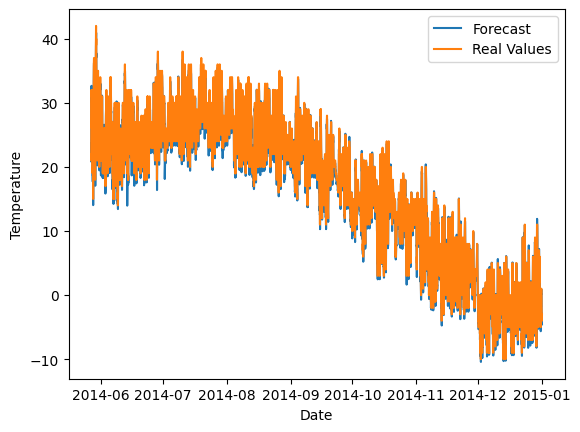

In [208]:
print(f"MSE: {mean_squared_error(data_2012_end['temp'].values[train_size + sequence_length :], predicted_data)}")
print(f"R2 score: {r2_score(data_2012_end['temp'].values[train_size + sequence_length :], predicted_data)}")

mse_dict['LTSM_2012_Temp'] = mean_squared_error(data_2012_end['temp'].values[train_size + sequence_length :], predicted_data)
r2_dict['LTSM_2012_Temp'] = r2_score(data_2012_end['temp'].values[train_size + sequence_length :], predicted_data)

# Wykres prognoz i rzeczywistych wartości
plt.plot(
    data_2012_end.index[train_size + sequence_length :],
    predicted_data,
    label="Forecast",
)
plt.plot(
    data_2012_end.index[train_size + sequence_length :],
    data_2012_end["temp"].values[train_size + sequence_length :],
    label="Real Values",
)
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()

In [209]:
# regresja liniowa

In [210]:
# Wczytaj dane z pliku CSV
data = pd.read_csv('data.csv')

# Konwertuj kolumnę "date" na obiekt datetime
data['date'] = pd.to_datetime(data['date'], format="%Y-%m-%d %H:%M:%S")

# Przekształć datę na liczbę dni od punktu odniesienia
data['days_since_reference'] = data['date'].apply(lambda x: x.toordinal())

In [211]:
# Przygotuj dane wejściowe i wyjściowe
X = data['days_since_reference'].values.reshape(-1, 1)
y = data['pollution']

In [212]:
# Utwórz model regresji liniowej
model = LinearRegression()

MSE: 8555.825989750156
R2 score: 0.0081766319948533


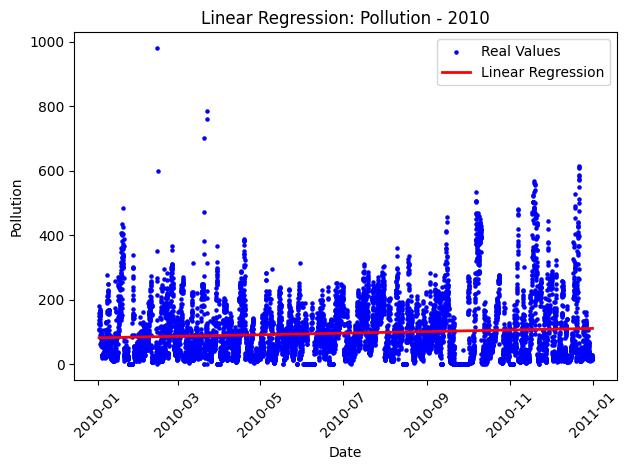

MSE: 8456.945088200573
R2 score: 0.02474938204747501


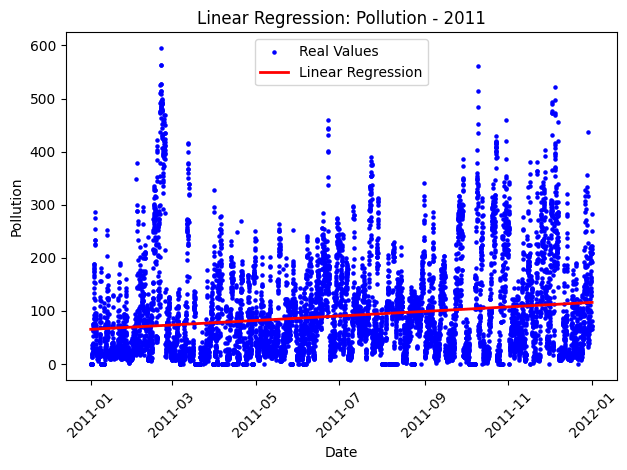

MSE: 6718.886716973891
R2 score: 0.003206745989554949


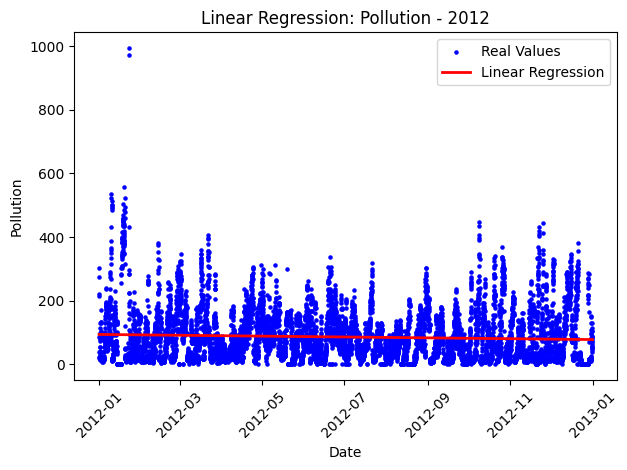

MSE: 9330.462392346406
R2 score: 0.03036202068250904


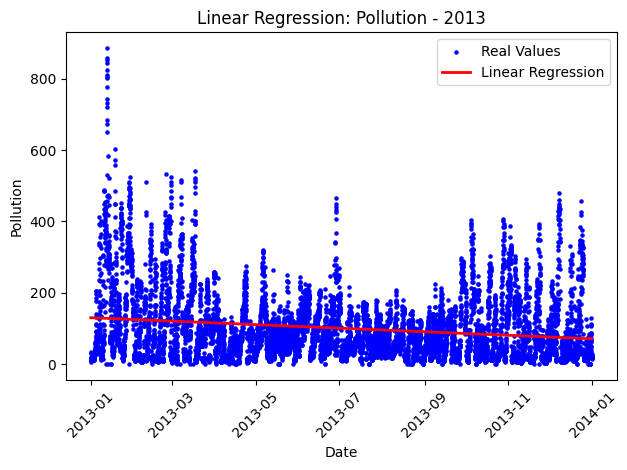

MSE: 8645.815486054935
R2 score: 0.012472596227210864


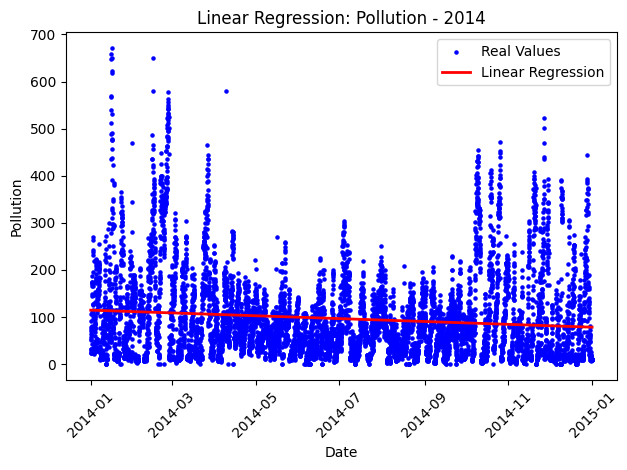

In [213]:
# Grupuj dane według roku
grouped = data.groupby(data['date'].dt.year)

# Stwórz wykresy dla każdego roku osobno
for year, group in grouped:
    # Przygotuj dane wejściowe i wyjściowe dla danego roku
    X = group['days_since_reference'].values.reshape(-1, 1)
    y = group['pollution']
    
    # Dopasuj model do danych danego roku
    model.fit(X, y)
    
    # Oblicz wartości przewidywane dla danych danego roku
    y_pred = model.predict(X)

    print(f"MSE: {mean_squared_error(group['pollution'], y_pred)}")
    print(f"R2 score: {r2_score(group['pollution'], y_pred)}")

    mse_dict[f'Linear_Regression_{year}_Pollution'] = mean_squared_error(group['pollution'], y_pred)
    r2_dict[f'Linear_Regression_{year}_Pollution'] = r2_score(group['pollution'], y_pred)
    
    # Stwórz wykres
    fig, ax = plt.subplots()
    ax.scatter(group['date'], group['pollution'], color='blue', label='Real Values', s = 5)
    ax.plot(group['date'], y_pred, color='red', linewidth=2, label='Linear Regression')
    ax.set_xlabel('Date')
    ax.set_ylabel('Pollution')
    ax.set_title('Linear Regression: Pollution - {}'.format(year))
    ax.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [214]:
#regresja wieloraka

In [215]:
# Przygotuj dane wejściowe i wyjściowe
X = data[['days_since_reference', 'temp']]
y = data['pollution']

In [216]:
# Utwórz model regresji liniowej wielorakiej
model = LinearRegression()

MSE: 8553.205299768055
R2 score: 0.008480432185233422


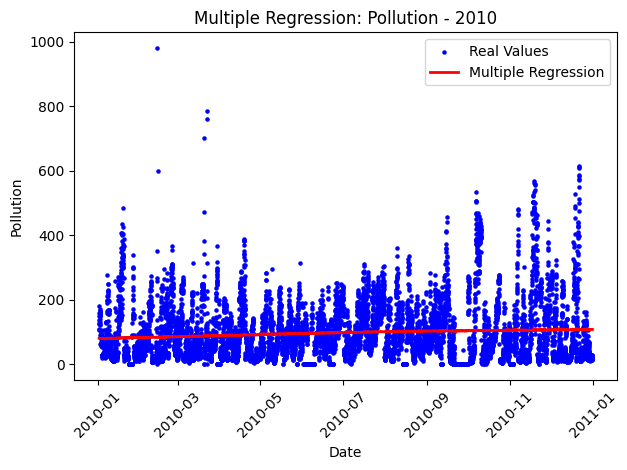

MSE: 8452.574295377794
R2 score: 0.025253419658799237


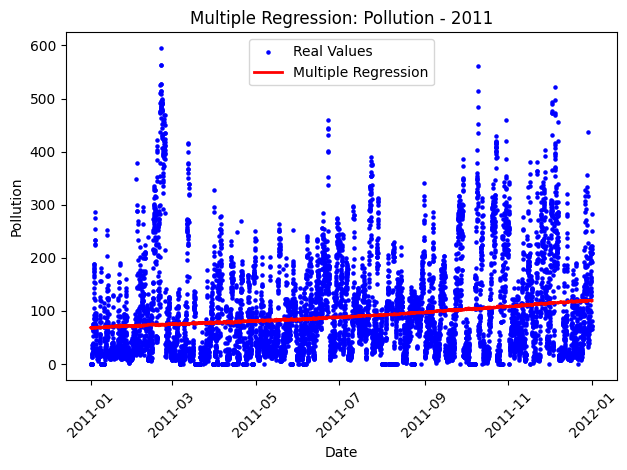

MSE: 6695.175414708296
R2 score: 0.006724481462373477


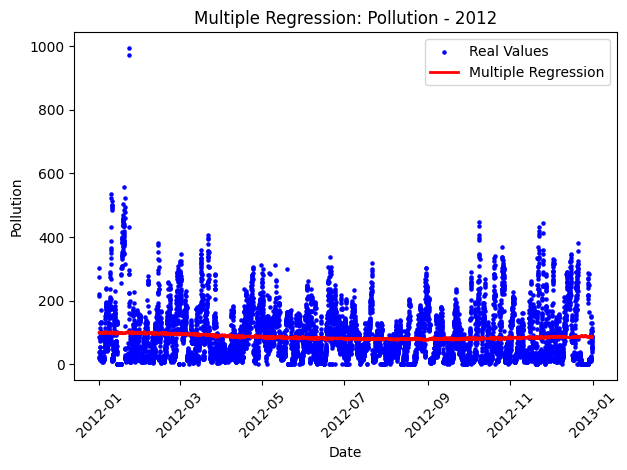

MSE: 8971.296691352336
R2 score: 0.06768714883882754


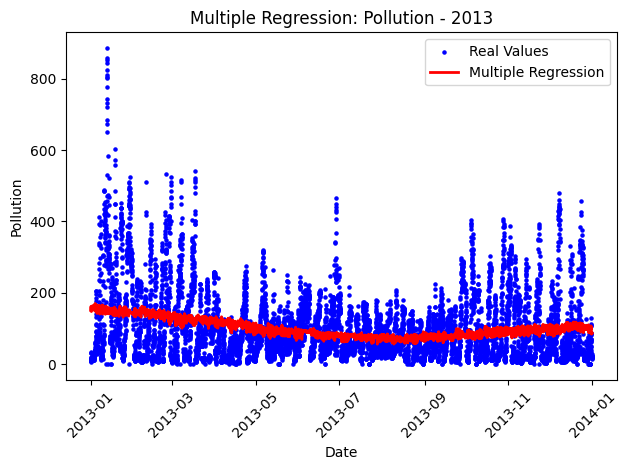

MSE: 8314.965073721449
R2 score: 0.05026242059436581


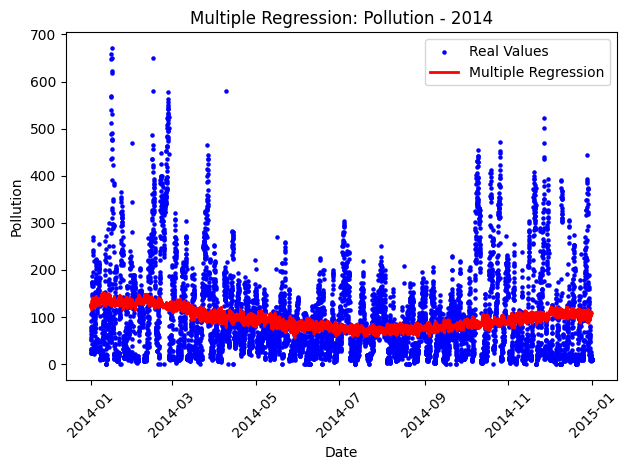

In [217]:
# Grupuj dane według roku
grouped = data.groupby(data['date'].dt.year)

# Stwórz wykresy dla każdego roku osobno
for year, group in grouped:
    # Dopasuj model do danych danego roku
    X_year = group[['days_since_reference', 'temp']]
    y_year = group['pollution']
    model.fit(X_year, y_year)
    
    # Oblicz wartości przewidywane dla danych danego roku
    y_pred = model.predict(X_year)
    
    print(f"MSE: {mean_squared_error(group['pollution'], y_pred)}")
    print(f"R2 score: {r2_score(group['pollution'], y_pred)}")

    mse_dict[f'Linear_Regression_2_{year}_Pollution'] = mean_squared_error(group['pollution'], y_pred)
    r2_dict[f'Linear_Regression_2_{year}_Pollution'] = r2_score(group['pollution'], y_pred)

    # Stwórz wykres
    fig, ax = plt.subplots()
    ax.scatter(group['date'], group['pollution'], color='blue', label='Real Values', s = 5)
    ax.plot(group['date'], y_pred, color='red', linewidth=2, label='Multiple Regression')
    ax.set_xlabel('Date')
    ax.set_ylabel('Pollution')
    ax.set_title(f'Multiple Regression: Pollution - {year}')
    ax.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

MSE: 9712.913205421059
R2 score: -0.11983556268282003


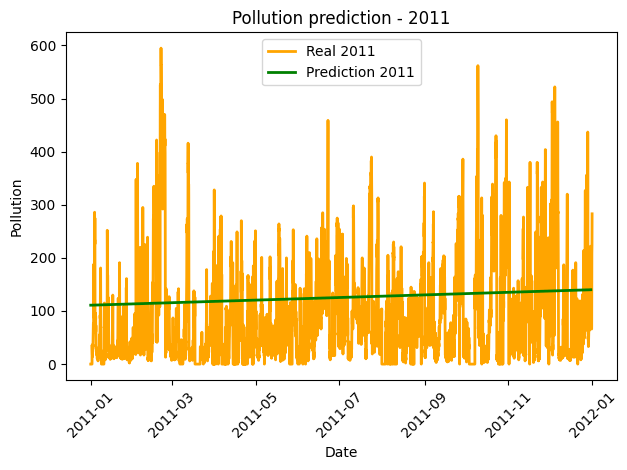

In [218]:
# Przygotuj dane wejściowe i wyjściowe dla roku 2010
X_2010 = data[data['date'].dt.year == 2010]['days_since_reference'].values.reshape(-1, 1)
y_2010 = data[data['date'].dt.year == 2010]['pollution']

# Utwórz model regresji liniowej
model = LinearRegression()

# Dopasuj model do danych z roku 2010
model.fit(X_2010, y_2010)

# Przygotuj dane wejściowe dla roku 2011
input_data_2011 = pd.DataFrame({'date': pd.date_range('2011-01-01', '2011-12-31', freq='H')})
input_data_2011['days_since_reference'] = input_data_2011['date'].apply(lambda x: x.toordinal())

# Wykonaj predykcję dla danych wejściowych z roku 2011
y_pred_2011 = model.predict(input_data_2011['days_since_reference'].values.reshape(-1, 1))
actual_data_2011 = data[data['date'].dt.year == 2011]

print(f"MSE: {mean_squared_error(actual_data_2011['pollution'].iloc[:8737], y_pred_2011)}")
print(f"R2 score: {r2_score(actual_data_2011['pollution'].iloc[:8737], y_pred_2011)}")

mse_dict[f'LTSM_{year}_Pollution'] = mean_squared_error(group['pollution'], y_pred)
r2_dict[f'LTSM_{year}_Pollution'] = r2_score(group['pollution'], y_pred)

# Stwórz wykres predykcji dla roku 2011
fig, ax = plt.subplots()

ax.plot(actual_data_2011['date'], actual_data_2011['pollution'], color='orange', linewidth=2, label='Real 2011')
ax.plot(input_data_2011['date'], y_pred_2011, color='green', linewidth=2, label='Prediction 2011')
ax.set_xlabel('Date')
ax.set_ylabel('Pollution')
ax.set_title('Pollution prediction - 2011')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

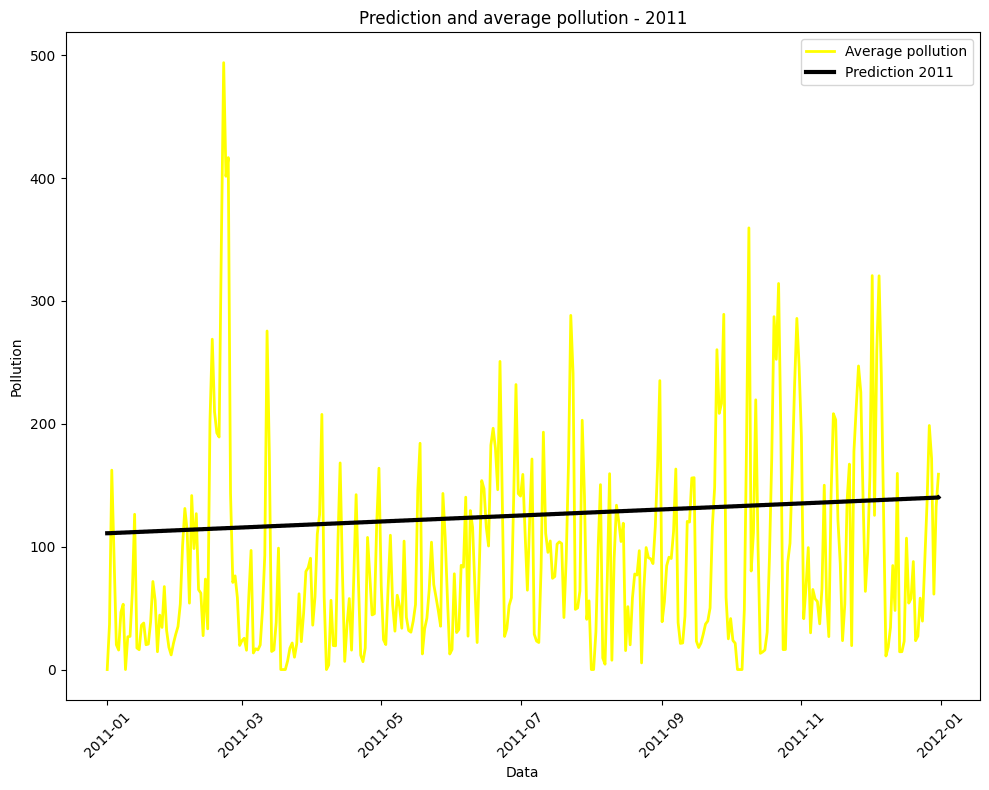

In [222]:
# Utwórz model regresji liniowej
model = LinearRegression()

# Przygotuj dane wejściowe i wyjściowe dla roku 2010
X_2010 = data[data['date'].dt.year == 2010]['days_since_reference'].values.reshape(-1, 1)
y_2010 = data[data['date'].dt.year == 2010]['pollution']

# Dopasuj model do danych z roku 2010
model.fit(X_2010, y_2010)

# Przygotuj dane wejściowe dla roku 2011
input_data_2011 = pd.DataFrame({'date': pd.date_range('2011-01-01', '2011-12-31', freq='H')})
input_data_2011['days_since_reference'] = input_data_2011['date'].apply(lambda x: x.toordinal())

# Wykonaj predykcję dla danych wejściowych z roku 2011
y_pred_2011 = model.predict(input_data_2011['days_since_reference'].values.reshape(-1, 1))

# Oblicz średnie zanieczyszczenie dla każdego dnia w roku 2011
data_2011 = data[data['date'].dt.year == 2011]
daily_mean_pollution = data_2011.groupby(data_2011['date'].dt.date)['pollution'].mean()

# Stwórz wykres łączący predykcję i średnie zanieczyszczenie
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(daily_mean_pollution.index, daily_mean_pollution.values, color='yellow', linewidth=2, label='Average pollution')
ax.plot(input_data_2011['date'], y_pred_2011, color='black', linewidth=3, label='Prediction 2011')
ax.set_xlabel('Data')
ax.set_ylabel('Pollution')
ax.set_title('Prediction and average pollution - 2011')
ax.legend()
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

MSE: 8813.601209314846
R^2: 0.00014169949698750184


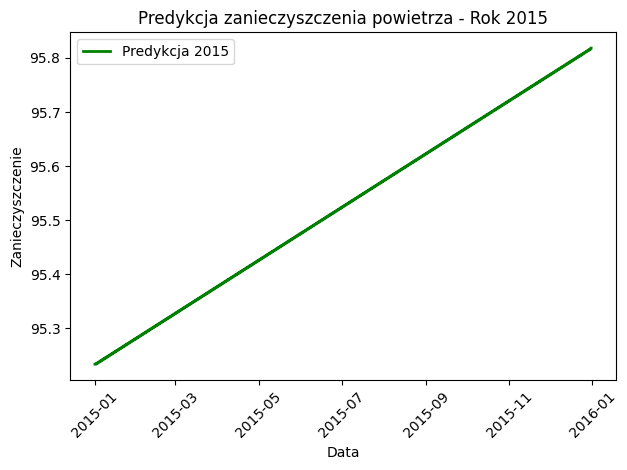

In [220]:
from sklearn.metrics import mean_squared_error, r2_score

# Przygotuj dane wejściowe i wyjściowe
X = data['days_since_reference'].values.reshape(-1, 1)
y = data['pollution']

# Podziel dane na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Utwórz model regresji liniowej
model = LinearRegression()

# Dopasuj model do danych treningowych
model.fit(X_train, y_train)

# Oblicz wartości przewidywane dla danych testowych
y_pred = model.predict(X_test)

# Oblicz średni błąd kwadratowy (MSE)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# Oblicz współczynnik determinacji R^2
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

# Przygotuj dane wejściowe dla roku 2015
input_data_2015 = pd.DataFrame({'date': pd.date_range('2015-01-01', '2015-12-31', freq='H')})
input_data_2015['days_since_reference'] = input_data_2015['date'].apply(lambda x: x.toordinal())

# Wykonaj predykcję dla danych wejściowych z 2015 roku
y_pred_2015 = model.predict(input_data_2015['days_since_reference'].values.reshape(-1, 1))

# Stwórz wykres predykcji dla roku 2015
fig, ax = plt.subplots()
ax.plot(input_data_2015['date'], y_pred_2015, color='green', linewidth=2, label='Predykcja 2015')
ax.set_xlabel('Data')
ax.set_ylabel('Zanieczyszczenie')
ax.set_title('Predykcja zanieczyszczenia powietrza - Rok 2015')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [240]:
print(mse_dict)
print(r2_dict)

arima_poll_mse_dict = {
    2010: mse_dict['ARIMA_2010_Pollution'],
    2011: mse_dict['ARIMA_2011_Pollution'],
    2012: mse_dict['ARIMA_2012_Pollution'],
}

arima_temp_mse_dict = {
    2010: mse_dict['ARIMA_2010_Temp'],
    2011: mse_dict['ARIMA_2011_Temp'],
    2012: mse_dict['ARIMA_2012_Temp'],
}

lstm_poll_mse_dict = {
    2010: mse_dict['LTSM_2010_Pollution'],
    2011: mse_dict['LTSM_2011_Pollution'],
    2012: mse_dict['LTSM_2012_Pollution'],
}

lstm_temp_mse_dict = {
    2010: mse_dict['LTSM_2010_Temp'],
    2011: mse_dict['LTSM_2011_Temp'],
    2012: mse_dict['LTSM_2012_Temp'],
}

lr_poll_mse_dict = {
    2010: mse_dict['Linear_Regression_2010_Pollution'],
    2011: mse_dict['Linear_Regression_2011_Pollution'],
    2012: mse_dict['Linear_Regression_2012_Pollution'],
}

mr_poll_mse_dict = {
    2010: mse_dict['Linear_Regression_2_2010_Pollution'],
    2011: mse_dict['Linear_Regression_2_2011_Pollution'],
    2012: mse_dict['Linear_Regression_2_2012_Pollution'],
}

arima_poll_r2_dict = {
    2010: r2_dict['ARIMA_2010_Pollution'],
    2011: r2_dict['ARIMA_2011_Pollution'],
    2012: r2_dict['ARIMA_2012_Pollution'],
}

arima_temp_r2_dict = {
    2010: r2_dict['ARIMA_2010_Temp'],
    2011: r2_dict['ARIMA_2011_Temp'],
    2012: r2_dict['ARIMA_2012_Temp'],
}

lstm_poll_r2_dict = {
    2010: r2_dict['LTSM_2010_Pollution'],
    2011: r2_dict['LTSM_2011_Pollution'],
    2012: r2_dict['LTSM_2012_Pollution'],
}

lstm_temp_r2_dict = {
    2010: r2_dict['LTSM_2010_Temp'],
    2011: r2_dict['LTSM_2011_Temp'],
    2012: r2_dict['LTSM_2012_Temp'],
}

lr_poll_r2_dict = {
    2010: r2_dict['Linear_Regression_2010_Pollution'],
    2011: r2_dict['Linear_Regression_2011_Pollution'],
    2012: r2_dict['Linear_Regression_2012_Pollution'],
}

mr_poll_r2_dict = {
    2010: r2_dict['Linear_Regression_2_2010_Pollution'],
    2011: r2_dict['Linear_Regression_2_2011_Pollution'],
    2012: r2_dict['Linear_Regression_2_2012_Pollution'],
}

{'ARIMA_2010_Pollution': 6638.223454855195, 'ARIMA_2011_Pollution': 39415.894184107594, 'ARIMA_2012_Pollution': 8105.91838010485, 'ARIMA_2010_Temp': 2.7612363287834762, 'ARIMA_2011_Temp': 17.72205645674874, 'ARIMA_2012_Temp': 13.123987475257895, 'LTSM_2010_Pollution': 668.4657254239478, 'LTSM_2011_Pollution': 1019.6993222802915, 'LTSM_2012_Pollution': 437.2576285942832, 'LTSM_2010_Temp': 2.476481815381229, 'LTSM_2011_Temp': 2.0884971061818587, 'LTSM_2012_Temp': 2.0529018944269244, 'Linear_Regression_2010_Pollution': 8555.825989750156, 'Linear_Regression_2011_Pollution': 8456.945088200573, 'Linear_Regression_2012_Pollution': 6718.886716973891, 'Linear_Regression_2013_Pollution': 9330.462392346406, 'Linear_Regression_2014_Pollution': 8645.815486054935, 'Linear_Regression_2_2010_Pollution': 8553.205299768055, 'Linear_Regression_2_2011_Pollution': 8452.574295377794, 'Linear_Regression_2_2012_Pollution': 6695.175414708296, 'Linear_Regression_2_2013_Pollution': 8971.296691352336, 'Linear_Reg

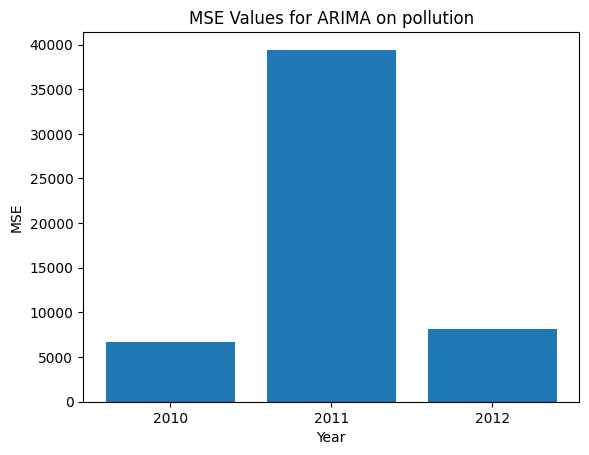

In [233]:
plt.bar(range(len(arima_poll_mse_dict)), list(arima_poll_mse_dict.values()), tick_label = list(arima_poll_mse_dict.keys()))
plt.title('MSE Values for ARIMA on pollution')
plt.xlabel('Year')
plt.ylabel('MSE')
plt.show()

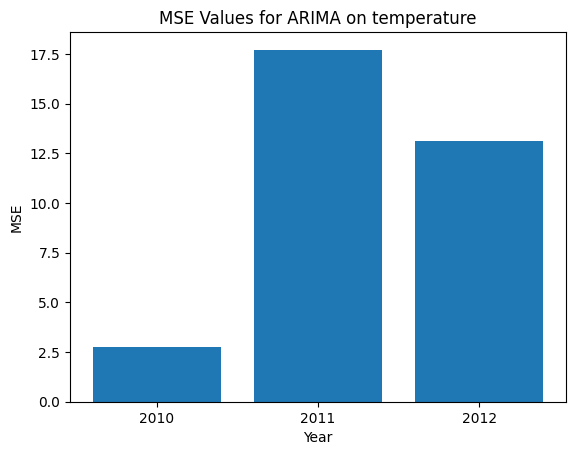

In [234]:
plt.bar(range(len(arima_temp_mse_dict)), list(arima_temp_mse_dict.values()), tick_label = list(arima_temp_mse_dict.keys()))
plt.title('MSE Values for ARIMA on temperature')
plt.xlabel('Year')
plt.ylabel('MSE')
plt.show()

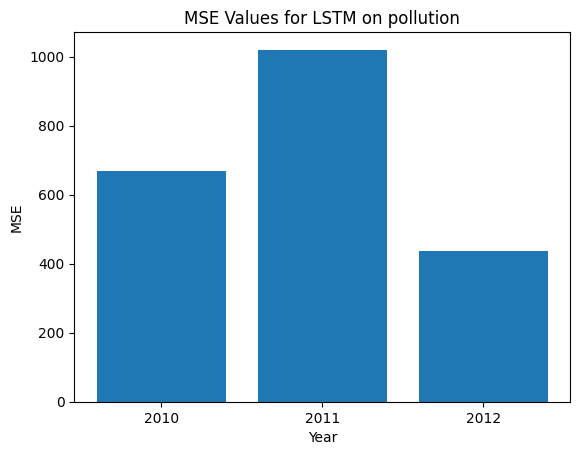

In [235]:
plt.bar(range(len(lstm_poll_mse_dict)), list(lstm_poll_mse_dict.values()), tick_label = list(arima_poll_mse_dict.keys()))
plt.title('MSE Values for LSTM on pollution')
plt.xlabel('Year')
plt.ylabel('MSE')
plt.show()

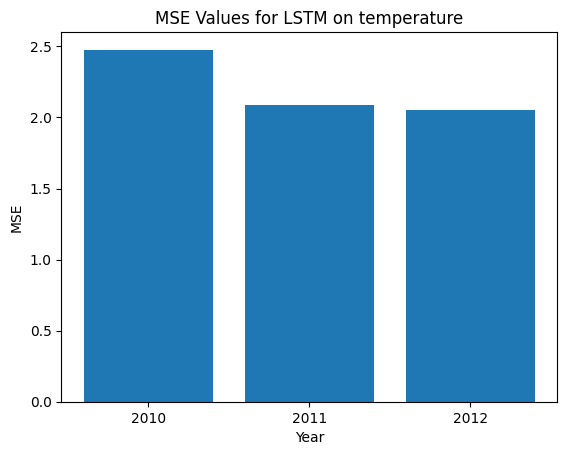

In [237]:
plt.bar(range(len(lstm_temp_mse_dict)), list(lstm_temp_mse_dict.values()), tick_label = list(lstm_temp_mse_dict.keys()))
plt.title('MSE Values for LSTM on temperature')
plt.xlabel('Year')
plt.ylabel('MSE')
plt.show()

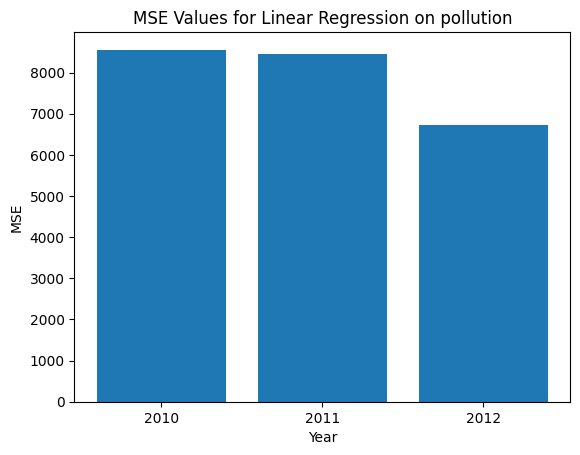

In [238]:
plt.bar(range(len(lr_poll_mse_dict)), list(lr_poll_mse_dict.values()), tick_label = list(lr_poll_mse_dict.keys()))
plt.title('MSE Values for Linear Regression on pollution')
plt.xlabel('Year')
plt.ylabel('MSE')
plt.show()

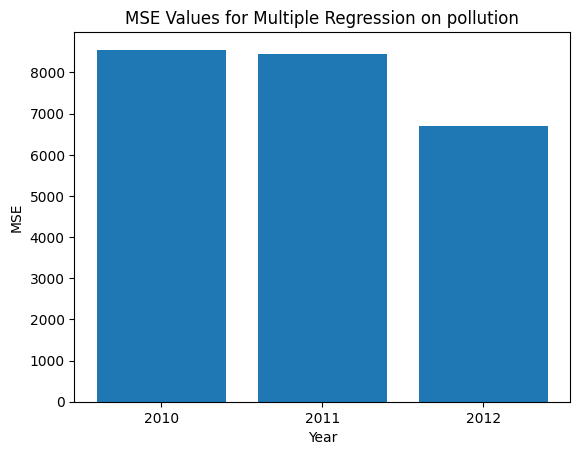

In [239]:
plt.bar(range(len(mr_poll_mse_dict)), list(mr_poll_mse_dict.values()), tick_label = list(mr_poll_mse_dict.keys()))
plt.title('MSE Values for Multiple Regression on pollution')
plt.xlabel('Year')
plt.ylabel('MSE')
plt.show()

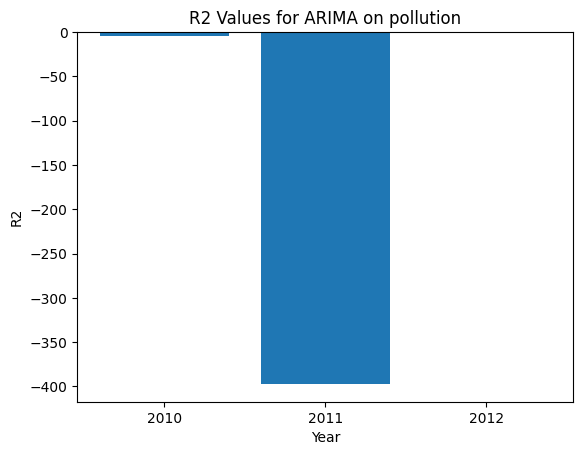

In [241]:
plt.bar(range(len(arima_poll_r2_dict)), list(arima_poll_r2_dict.values()), tick_label = list(arima_poll_r2_dict.keys()))
plt.title('R2 Values for ARIMA on pollution')
plt.xlabel('Year')
plt.ylabel('R2')
plt.show()

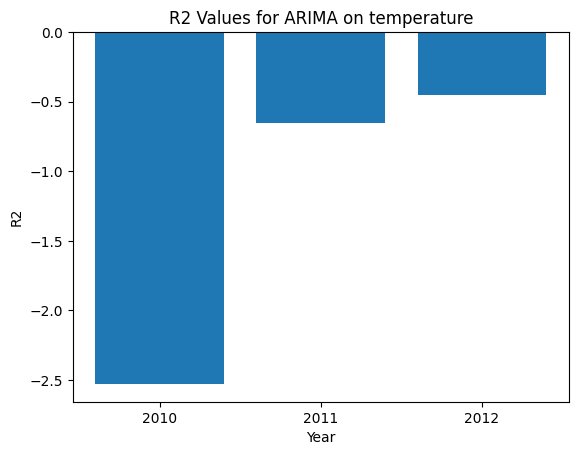

In [242]:
plt.bar(range(len(arima_temp_r2_dict)), list(arima_temp_r2_dict.values()), tick_label = list(arima_temp_r2_dict.keys()))
plt.title('R2 Values for ARIMA on temperature')
plt.xlabel('Year')
plt.ylabel('R2')
plt.show()

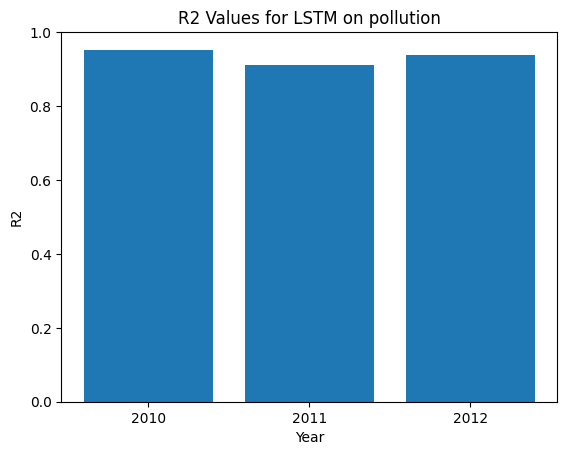

In [243]:
plt.bar(range(len(lstm_poll_r2_dict)), list(lstm_poll_r2_dict.values()), tick_label = list(lstm_poll_r2_dict.keys()))
plt.title('R2 Values for LSTM on pollution')
plt.xlabel('Year')
plt.ylabel('R2')
plt.show()

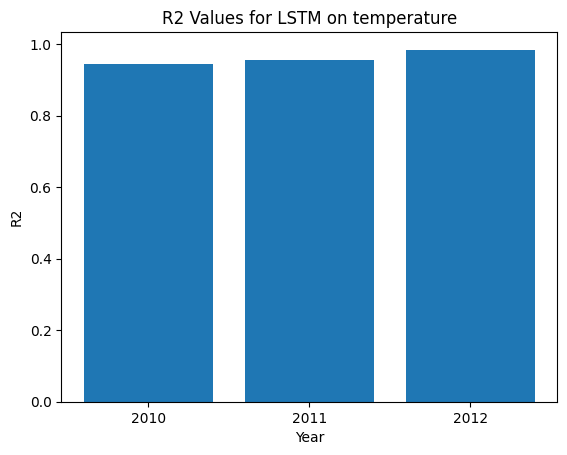

In [244]:
plt.bar(range(len(lstm_temp_r2_dict)), list(lstm_temp_r2_dict.values()), tick_label = list(lstm_temp_r2_dict.keys()))
plt.title('R2 Values for LSTM on temperature')
plt.xlabel('Year')
plt.ylabel('R2')
plt.show()

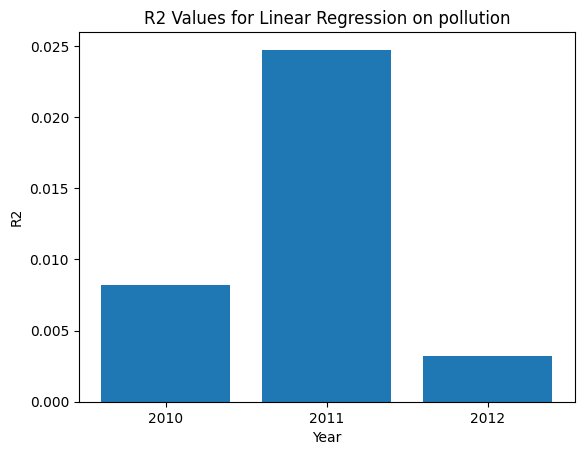

In [245]:
plt.bar(range(len(lr_poll_r2_dict)), list(lr_poll_r2_dict.values()), tick_label = list(lr_poll_r2_dict.keys()))
plt.title('R2 Values for Linear Regression on pollution')
plt.xlabel('Year')
plt.ylabel('R2')
plt.show()

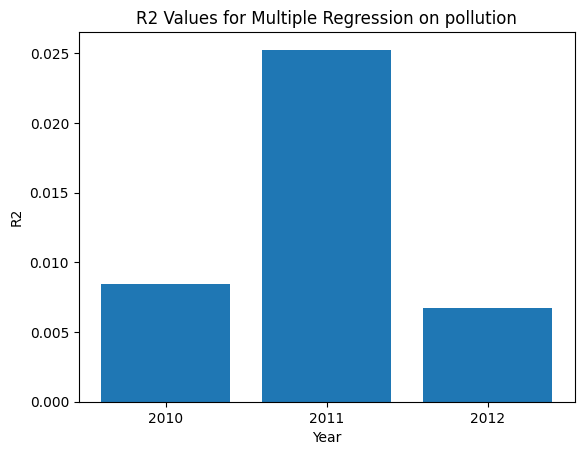

In [246]:
plt.bar(range(len(mr_poll_r2_dict)), list(mr_poll_r2_dict.values()), tick_label = list(mr_poll_r2_dict.keys()))
plt.title('R2 Values for Multiple Regression on pollution')
plt.xlabel('Year')
plt.ylabel('R2')
plt.show()